In [61]:
from sklearn.model_selection import train_test_split, cross_val_score

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [62]:
%reload_ext nb_black
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import plotly
import seaborn as sns

%matplotlib inline
from scipy import stats
import statsmodels.api as sm
import functions_pkg

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Weather

In [63]:
postgres_user = "dsbc_student"
postgres_pw = "7*.8G9QH21"
postgres_host = "142.93.121.174"
postgres_port = "5432"
postgres_db = "weatherinszeged"
conn_str = f"postgresql://{postgres_user}:{postgres_pw}@{postgres_host}:{postgres_port}/{postgres_db}"
query = """
SELECT *
FROM weatherinszeged
"""
df = pd.read_sql_query(query, con=conn_str)
df.head()

,date,summary,preciptype,temperature,apparenttemperature,humidity,windspeed,windbearing,visibility,loudcover,pressure,dailysummary
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [64]:
# create new feature for difference in apparent temp  and temp
df["temp_diff"] = df.apparenttemperature - df.temperature

# create feature for humidity windspeed interaction
df["int_term"] = df.humidity * df.windspeed

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [65]:
# create vars for model
X = df[["humidity", "windspeed"]]
y = df.temp_diff

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=28)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [66]:
# create the X train constant var
X_train_const = sm.add_constant(X_train)
# create model object for sm.OLS
model = sm.OLS(y_train, X_train_const).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              temp_diff   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                 1.455e+04
Date:                Wed, 09 Dec 2020   Prob (F-statistic):               0.00
Time:                        16:11:58   Log-Likelihood:            -1.2779e+05
No. Observations:               72339   AIC:                         2.556e+05
Df Residuals:                   72336   BIC:                         2.556e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4279      0.024    100.086      0.000       2.380       2.475
humidity      -3.0166      0.028   -109.109      0.000      -3.071      -2.962
windspeed     -0.1188      0.001   -152.265      0.000      -0.120      -0.117
==============================================================================
Omnibus:                     2951.607   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3454.916
Skew:                          -0.479   Prob(JB):                         0.00
Kurtosis:                       3.479   Cond. No.                         88.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

> r-squared = 0.287
> adj r-square = 0.287
> these values are too low; model is underfit
---

In [67]:
# create model with interaction term for humidity and windspeed
# create vars for model
X = df[["humidity", "windspeed", "int_term"]]
y = df.temp_diff

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=28)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [68]:
# create regression model X train constant
X_train_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_const).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              temp_diff   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.340
Method:                 Least Squares   F-statistic:                 1.242e+04
Date:                Wed, 09 Dec 2020   Prob (F-statistic):               0.00
Time:                        16:11:58   Log-Likelihood:            -1.2499e+05
No. Observations:               72339   AIC:                         2.500e+05
Df Residuals:                   72335   BIC:                         2.500e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0852      0.039      2.207      0.027       0.010       0.161
humidity       0.1709      0.050      3.450      0.001       0.074       0.268
windspeed      0.0898      0.003     31.653      0.000       0.084       0.095
int_term      -0.2950      0.004    -76.244      0.000      -0.303      -0.287
==============================================================================
Omnibus:                     3720.473   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7183.385
Skew:                          -0.383   Prob(JB):                         0.00
Kurtosis:                       4.340   Cond. No.                         193.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

> the r-squared values improved by around 0.06 points with the interaction term
---

In [69]:
# add visibility as a feature var
X = df[["humidity", "windspeed", "visibility"]]
y = df.temp_diff

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=28)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [70]:
# create model object
X_train_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_const).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              temp_diff   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                 1.046e+04
Date:                Wed, 09 Dec 2020   Prob (F-statistic):               0.00
Time:                        16:13:20   Log-Likelihood:            -1.2698e+05
No. Observations:               72339   AIC:                         2.540e+05
Df Residuals:                   72335   BIC:                         2.540e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5649      0.032     48.702      0.000       1.502       1.628
humidity      -2.5925      0.029    -88.511      0.000      -2.650      -2.535
windspeed     -0.1194      0.001   -154.751      0.000      -0.121      -0.118
visibility     0.0539      0.001     40.375      0.000       0.051       0.057
==============================================================================
Omnibus:                     2868.498   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3422.938
Skew:                          -0.459   Prob(JB):                         0.00
Kurtosis:                       3.540   Cond. No.                         131.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

> The r-squared values increased another 0.02 points with visibility
> the interaction term imporved the r-squared value more
---

> the last model is the best in regards to AIC and BIC

# Houseprices

In [20]:
postgres_user = "dsbc_student"
postgres_pw = "7*.8G9QH21"
postgres_host = "142.93.121.174"
postgres_port = "5432"
postgres_db = "houseprices"
conn_str = f"postgresql://{postgres_user}:{postgres_pw}@{postgres_host}:{postgres_port}/{postgres_db}"
query = """
SELECT *
FROM houseprices
"""
df = pd.read_sql_query(query, con=conn_str)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [21]:
# drop id col
df = df.drop(columns=["id"])
df.head()

,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,0,None,None,None,0,12,2008,WD,Normal,250000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Null values

In [22]:
# drop cols with high null count
df.drop(
    columns=["poolqc", "alley", "miscfeature", "fence", "fireplacequ", "lotfrontage"],
    inplace=True,
)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [23]:
df.garagetype.value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: garagetype, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [24]:
# fill in null garage types with none
df.garagetype.fillna("None", inplace=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [25]:
# drop cols for garage, basement, and masonry veneer extra information
df.drop(
    columns=[
        "garageyrblt",
        "garagefinish",
        "garagecond",
        "garagequal",
        "bsmtfintype2",
        "bsmtexposure",
        "bsmtfintype1",
        "bsmtqual",
        "bsmtcond",
        "masvnrtype",
        "masvnrarea",
    ],
    inplace=True,
)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [26]:
# drop null rows from electrical column
df.dropna(subset=["electrical"], inplace=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [27]:
df.isna().mean().sort_values(ascending=False).head(10)

saleprice      0.0
overallcond    0.0
totalbsmtsf    0.0
bsmtunfsf      0.0
bsmtfinsf2     0.0
bsmtfinsf1     0.0
foundation     0.0
extercond      0.0
exterqual      0.0
exterior2nd    0.0
dtype: float64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Var exploration

In [28]:
df.mssubclass.value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      57
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: mssubclass, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

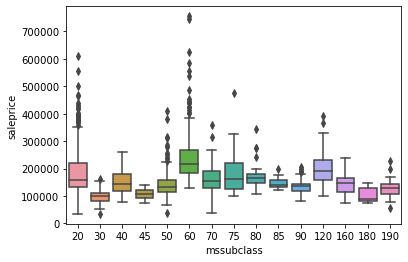

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [29]:
# checking relationship in distribution of saleprice of zoning classes
sns.boxplot("mssubclass", "saleprice", data=df)
plt.show()

> Not really any clear relationship between mszoning and saleprice
---

In [30]:
# dropping columns for mssubclass and mszoning
# df.drop(columns=["mssubclass", "mszoning"], inplace=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

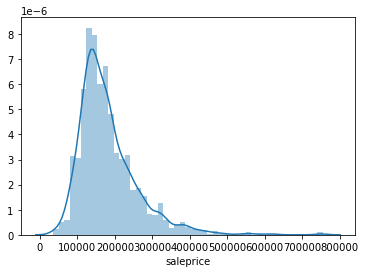

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [31]:
sns.distplot(df.saleprice)

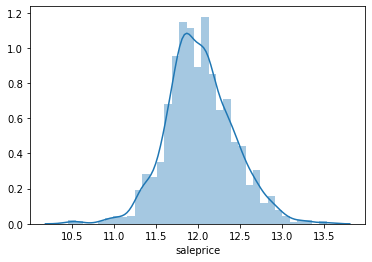

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [32]:
df.saleprice = np.log(df.saleprice)
sns.distplot(df.saleprice)
plt.show()

In [33]:
df.columns

Index(['mssubclass', 'mszoning', 'lotarea', 'street', 'lotshape',
       'landcontour', 'utilities', 'lotconfig', 'landslope', 'neighborhood',
       'condition1', 'condition2', 'bldgtype', 'housestyle', 'overallqual',
       'overallcond', 'yearbuilt', 'yearremodadd', 'roofstyle', 'roofmatl',
       'exterior1st', 'exterior2nd', 'exterqual', 'extercond', 'foundation',
       'bsmtfinsf1', 'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'heating',
       'heatingqc', 'centralair', 'electrical', 'firstflrsf', 'secondflrsf',
       'lowqualfinsf', 'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath',
       'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'kitchenqual',
       'totrmsabvgrd', 'functional', 'fireplaces', 'garagetype', 'garagecars',
       'garagearea', 'paveddrive', 'wooddecksf', 'openporchsf',
       'enclosedporch', 'threessnporch', 'screenporch', 'poolarea', 'miscval',
       'mosold', 'yrsold', 'saletype', 'salecondition', 'saleprice'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [34]:
df["baths_full"] = df.fullbath + df.bsmtfullbath
df["baths_half"] = df.halfbath + df.bsmthalfbath
df["basement_sf"] = df.totalbsmtsf = df.bsmtunfsf
df["adj_sf"] = df.grlivarea + df.basement_sf

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [35]:
feature_vars = [
    "lotarea",
    "neighborhood",
    "yearbuilt",
    "centralair",
    "baths_full",
    "baths_half",
    "bedroomabvgr",
    "adj_sf",
]

secondary_vars = [
    "poolqc",
    "garagecond",
    "garagequal",
    "fireplacequ",
    "functional",
    "kitchenqual",
    "bldgtype",
    "housestyle",
    "bsmtfullbath",
    "bsmthalfbath",
    "fireplaces",
    "garagearea",
    "wooddecksf",
    "openporchsf",
    "enclosedporch",
    "threessnporch",
    "screenporch",
    "poolarea",
    "kitchenabvgr",
    "totalbsmtsf",
    "overallcond",
    "overallqual",
]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [36]:
# centralair, paveddrive are binary vars; converting to numeric binary
df.centralair = pd.get_dummies(df.centralair, drop_first=True)
df.paveddrive = pd.get_dummies(df.paveddrive, drop_first=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Numeric Vars

In [37]:
num_vars = []
obj_vars = []

for var in df.columns:
    if np.dtype(df[var]) == "object":
        obj_vars.append(var)
    else:
        num_vars.append(var)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [38]:
# num_df = df[
#     [
        
#             "saleprice",
#             "lotarea",
#             "overallqual",
#             "overallcond",
#             "yearbuilt",
#             "yearremodadd",
#             "bsmtfinsf1",
#             "bsmtfinsf2",
#             "bsmtunfsf",
#             "totalbsmtsf",
#             "centralair",
#             "firstflrsf",
#             "secondflrsf",
#             "lowqualfinsf",
#             "grlivarea",
#             "bsmtfullbath",
#             "bsmthalfbath",
#             "fullbath",
#             "halfbath",
#             "bedroomabvgr",
#             "kitchenabvgr",
#             "totrmsabvgrd",
#             "fireplaces",
#             "garagecars",
#             "garagearea",
#             "paveddrive",
#             "wooddecksf",
#             "openporchsf",
#             "enclosedporch",
#             "threessnporch",
#             "screenporch",
#             "poolarea",
#             "miscval",
#             "mosold",
#             "yrsold",
#             "saleprice",
#         ]
#     ]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Object Vars

In [39]:
df[
    [
        "saleprice",
        "street",
        "lotshape",
        "landcontour",
        "utilities",
        "lotconfig",
        "landslope",
        "neighborhood",
        "condition1",
        "condition2",
        "bldgtype",
        "housestyle",
        "roofstyle",
        "roofmatl",
        "exterior1st",
        "exterior2nd",
        "exterqual",
        "extercond",
        "foundation",
        "heating",
        "heatingqc",
        "electrical",
        "kitchenqual",
        "functional",
        "garagetype",
        "saletype",
        "salecondition",
    ]
]

,saleprice,street,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,...,extercond,foundation,heating,heatingqc,electrical,kitchenqual,functional,garagetype,saletype,salecondition
0,12.247694,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,TA,PConc,GasA,Ex,SBrkr,Gd,Typ,Attchd,WD,Normal
1,12.109011,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,CBlock,GasA,Ex,SBrkr,TA,Typ,Attchd,WD,Normal
2,12.317167,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,TA,PConc,GasA,Ex,SBrkr,Gd,Typ,Attchd,WD,Normal
3,11.849398,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,TA,BrkTil,GasA,Gd,SBrkr,Gd,Typ,Detchd,WD,Abnorml
4,12.429216,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,TA,PConc,GasA,Ex,SBrkr,Gd,Typ,Attchd,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,12.072541,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,TA,PConc,GasA,Ex,SBrkr,TA,Typ,Attchd,WD,Normal
1456,12.254863,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,TA,CBlock,GasA,TA,SBrkr,TA,Min1,Attchd,WD,Normal
1457,12.493130,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,Gd,Stone,GasA,Ex,SBrkr,Gd,Typ,Attchd,WD,Normal
1458,11.864462,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,TA,CBlock,GasA,Gd,FuseA,Gd,Typ,Attchd,WD,Normal


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Feature Vars

In [40]:
df2 = df[
    [
        "lotarea",
        "neighborhood",
        "yearbuilt",
        "centralair",
        "baths_full",
        "baths_half",
        "bedroomabvgr",
        "adj_sf",
        "overallqual",
        "grlivarea",
        "totrmsabvgrd",
        "fireplaces",
        "saleprice",
    ]
]

# y_df = df.saleprice

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [41]:
df2.head()

,lotarea,neighborhood,yearbuilt,centralair,baths_full,baths_half,bedroomabvgr,adj_sf,overallqual,grlivarea,totrmsabvgrd,fireplaces,saleprice
0,8450,CollgCr,2003,1,3,1,3,1860,7,1710,8,0,12.247694
1,9600,Veenker,1976,1,2,1,3,1546,6,1262,6,1,12.109011
2,11250,CollgCr,2001,1,3,1,3,2220,7,1786,6,1,12.317167
3,9550,Crawfor,1915,1,2,0,3,2257,7,1717,7,1,11.849398
4,14260,NoRidge,2000,1,3,1,4,2688,8,2198,9,1,12.429216


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [42]:
neighborhood_df = pd.get_dummies(df.neighborhood)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [43]:
df2 = df2.drop(["neighborhood"], axis=1).merge(
    neighborhood_df, left_index=True, right_index=True
)
df2.head()

,lotarea,yearbuilt,centralair,baths_full,baths_half,bedroomabvgr,adj_sf,overallqual,grlivarea,totrmsabvgrd,...,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker
0,8450,2003,1,3,1,3,1860,7,1710,8,...,0,0,0,0,0,0,0,0,0,0
1,9600,1976,1,2,1,3,1546,6,1262,6,...,0,0,0,0,0,0,0,0,0,1
2,11250,2001,1,3,1,3,2220,7,1786,6,...,0,0,0,0,0,0,0,0,0,0
3,9550,1915,1,2,0,3,2257,7,1717,7,...,0,0,0,0,0,0,0,0,0,0
4,14260,2000,1,3,1,4,2688,8,2198,9,...,1,0,0,0,0,0,0,0,0,0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [44]:
df2.columns

Index(['lotarea', 'yearbuilt', 'centralair', 'baths_full', 'baths_half',
       'bedroomabvgr', 'adj_sf', 'overallqual', 'grlivarea', 'totrmsabvgrd',
       'fireplaces', 'saleprice', 'Blmngtn', 'Blueste', 'BrDale', 'BrkSide',
       'ClearCr', 'CollgCr', 'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR',
       'MeadowV', 'Mitchel', 'NAmes', 'NPkVill', 'NWAmes', 'NoRidge',
       'NridgHt', 'OldTown', 'SWISU', 'Sawyer', 'SawyerW', 'Somerst',
       'StoneBr', 'Timber', 'Veenker'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

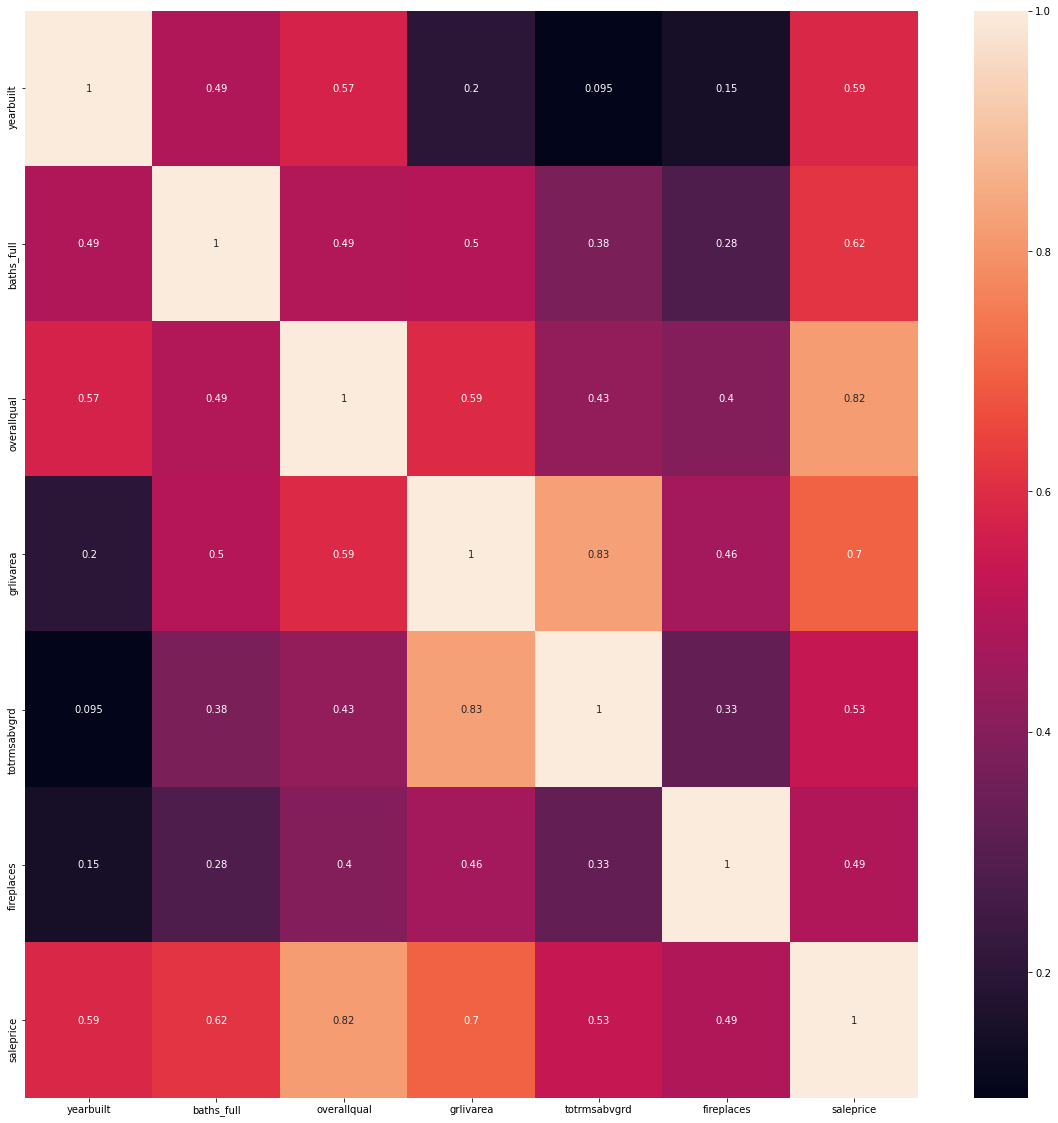

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [45]:
plt.figure(figsize=(20, 20))
sns.heatmap(
    df2[
        [
            "yearbuilt",
            "baths_full",
            "overallqual",
            "grlivarea",
            "totrmsabvgrd",
            "fireplaces",
            "saleprice",
        ]
    ].corr(),
    annot=True,
)
plt.show()

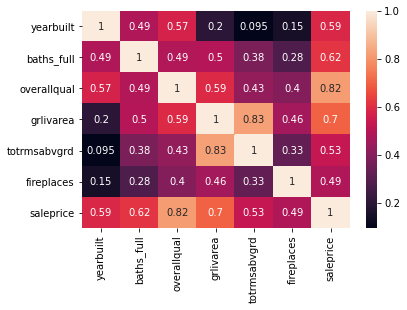

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [46]:
sns.heatmap(
    df2[
        [
            "yearbuilt",
            "baths_full",
            "overallqual",
            "grlivarea",
            "totrmsabvgrd",
            "fireplaces",
            "saleprice",
        ]
    ].corr(),
    annot=True,
)
plt.show()

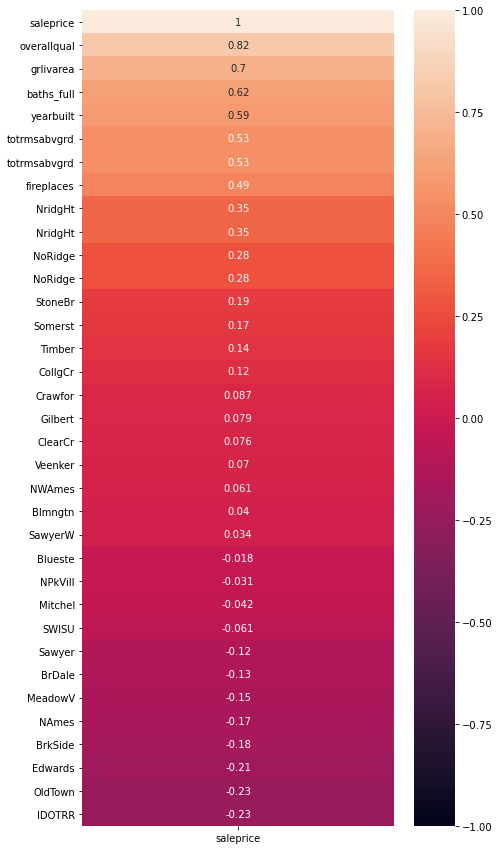

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [47]:
corr_df = df2[
    [
        "yearbuilt",
        "baths_full",
        "overallqual",
        "grlivarea",
        "totrmsabvgrd",
        "fireplaces",
        "saleprice",
        "NoRidge",
        "NridgHt",
        "totrmsabvgrd",
        "Blmngtn",
        "Blueste",
        "BrDale",
        "BrkSide",
        "ClearCr",
        "CollgCr",
        "Crawfor",
        "Edwards",
        "Gilbert",
        "IDOTRR",
        "MeadowV",
        "Mitchel",
        "NAmes",
        "NPkVill",
        "NWAmes",
        "NoRidge",
        "NridgHt",
        "OldTown",
        "SWISU",
        "Sawyer",
        "SawyerW",
        "Somerst",
        "StoneBr",
        "Timber",
        "Veenker",
    ]
]


saleprice_corrs = corr_df.corr()[["saleprice"]].sort_values(
    "saleprice", ascending=False
)
plt.figure(figsize=(7, 15))
sns.heatmap(saleprice_corrs, vmin=-1, vmax=1, annot=True)
plt.show()

In [48]:
var_df = df2[
    [
        "yearbuilt",
        "baths_full",
        "overallqual",
        "grlivarea",
        #         "totrmsabvgrd",
        "fireplaces",
        "saleprice",
        "NoRidge",
        "NridgHt",
        #         "NAmes",
        #         "OldTown",
    ]
]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [49]:
# sns.pairplot(var_df)
# plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Linear Regression Model

In [50]:
# create X and y vars for model
X = var_df.drop(columns="saleprice")
y = var_df.saleprice

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=7
)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [55]:
from sklearn.linear_model import LinearRegression

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [56]:
# linear regression model object
model = LinearRegression()

# fit the model to the data
model.fit(X_train, y_train)

# model results
print(model.coef_)
print(model.intercept_)

[0.00292063 0.06697232 0.1114741  0.00023557 0.07391571 0.06102308
 0.08870796]
5.044670880207414


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [57]:
# model train score
model.score(X_train, y_train)

0.8193832324201178

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [58]:
# model test score
model.score(X_test, y_test)

0.7769057951305667

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [59]:
import statsmodels.api as sm

# You need to manually add a constant
# in statsmodels' sm
X = sm.add_constant(X)

results = sm.OLS(y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     875.4
Date:                Wed, 09 Dec 2020   Prob (F-statistic):               0.00
Time:                        16:02:13   Log-Likelihood:                 474.55
No. Observations:                1459   AIC:                            -933.1
Df Residuals:                    1451   BIC:                            -890.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           5.4173      0.390     13.878      0.000       4.652       6.183
yearbuilt       0.0027      0.000     13.317      0.000       0.002       0.003
baths_full      0.0696      0.008      8.564      0.000       0.054       0.086
overallqual     0.1116      0.005     21.193      0.000       0.101       0.122
grlivarea       0.0002   1.28e-05     17.182      0.000       0.000       0.000
fireplaces      0.0764      0.008      9.360      0.000       0.060       0.092
NoRidge         0.0796      0.030      2.682      0.007       0.021       0.138
NridgHt         0.1062      0.022      4.749      0.000       0.062       0.150
==============================================================================
Omnibus:                      610.166   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8073.518
Skew:                          -1.577   Prob(JB):                         0.00
Kurtosis:                      14.084   Cond. No.                     2.13e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Interpreting Estimated Coefficients

> all the vars except for totalrmsabvgrd are statistically significant
> removing that var didn't change the p-vals for any other var
> other model score stats remained about the same
> every 1 pt increase in overal qual, increases the saleprice 0.11
> all other effects on saleprice are relatively small

## Model Performance

* the f-test prob shows that the null is rejected and the model is better than an intercept model
* r-squared values are both ~81%; the model performance is good
* AIC & BIC are both large negative values; model fit is good